В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.


Описание данных
* ad_id – идентификатор объявления (рекламы)
* xyz_campaign_id – идентификатор рекламной кампании в базе компании X
* fb_campaign_id – идентификатор кампании в Facebook
* age – возрастная группа, которой показывалась реклама
* gender – пол тех, кому показывалась реклама
* interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес)
* impressions – число показов
* clicks – число кликов
* spent – сумма, которую компания потратила на показ объявления 
* total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
* approved_conversion – количество людей, которые купили продукт после просмотра рекламы

### Задание 1

Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

Сколько уникальных рекламных кампаний было проведено?

*Использовать идентификатор кампании в базе Х – xyz_campaign_id.*

In [171]:
import pandas as pd
import numpy as np

In [172]:
conversion = pd.read_csv('conversion.csv')
conversion.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


In [173]:
conversion['xyz_campaign_id'].nunique()

3

Ответ: 3

### Задание 2

Посмотрите на данные и их описание. Соотнесите названия переменных с соответствующим типом данных

In [174]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


- clicks - **Дискретная**			
- gender - **Номинативная**			
- total_conversion - **Дискретная**				
- spent - **Непрерывная**				
- interest - **Номинативная**			
- age - **Ранговая/порядковая**			
- approved_conversion	- **Дискретная**			
- impressions - **Дискретная**	

### Задание 3

Постройте график распределения числа показов (Impressions – сколько раз пользователи увидели данное объявление) для каждой рекламной кампании в Facebook, прологарифмировав значения. Выберите верные утверждения:

* Распределение унимодальное
* Распределение бимодальное
* Полученное распределение не является нормальным
* Распределение симметричное
* Полученное распределение является нормальным

*np.log()*

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('Solarize_Light2')

In [176]:
log_fb = conversion.groupby('fb_campaign_id', as_index=False).sum()
log_fb = np.log(conversion['Impressions'])
log_fb.head(3)

0    8.902456
1    9.790375
2    6.541030
Name: Impressions, dtype: float64

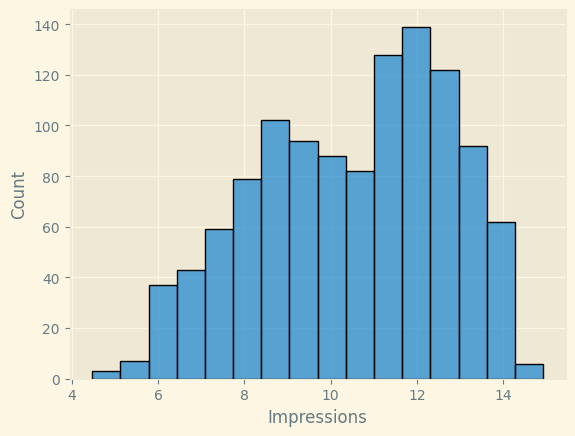

In [177]:
sns.histplot(log_fb);

Ответ:
* Распределение бимодальное
* Полученное распределение не является нормальным

### Задание 4

Теперь посчитаем ещё несколько полезных метрик. Первая – CTR (click-through rate), которая показывает кликабельность, т.е. отношение числа кликов к количеству показов.

*CTR = clicks / impressions*

Создайте новую колонку, затем посмотрите на описательные статистики. В качестве ответа укажите ad_id объявления с наибольшим CTR.

In [178]:
ctr = conversion.groupby('ad_id', as_index=False)\
                .agg({'Impressions' : 'sum',\
                      'Clicks' : 'sum'})
ctr.head(3)

,ad_id,Impressions,Clicks
0,708746,7350,1
1,708749,17861,2
2,708771,693,0


In [179]:
ctr['ctr'] = ctr['Clicks'] / ctr['Impressions']
ctr.head(3)

,ad_id,Impressions,Clicks,ctr
0,708746,7350,1,0.000136
1,708749,17861,2,0.000112
2,708771,693,0,0.000000


In [180]:
ctr['ctr'].idxmax()

150

In [181]:
round(ctr.iloc[150]['ad_id'])

738637

Ответ: 738637

### Задание 5

Визуализируйте CTR с разбивкой по номеру рекламной кампании (xyz_campaign_id). Какому графику соответствует распределение CTR кампании 916?

![](https://storage.yandexcloud.net/klms-public/production/learning-content/11/79/614/1768/8104/dfdfd.png)

In [182]:
conversion['ctr'] = ctr['ctr']
conversion.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000


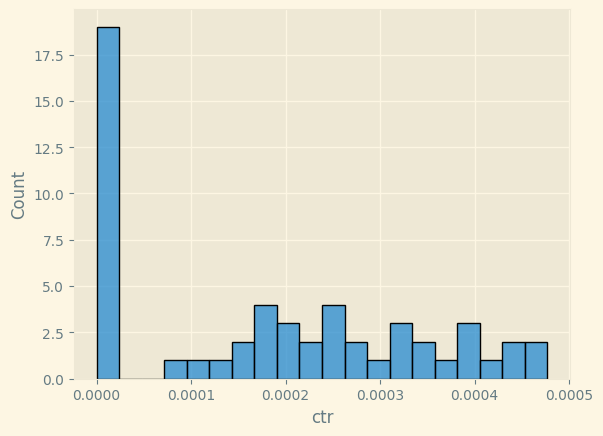

In [183]:
sns.histplot(conversion.query('xyz_campaign_id == 916')['ctr'], bins=20);

Ответ: С

### Задание 6

CPC (cost-per-click) – стоимость за клик пользователя по объявлению. Рассчитывается путём деления суммы потраченных денег на общее число кликов: *CPC= spent / clicks*

Выведите описательные статистики для новой переменной, посмотрите на форму распределения. В ответе укажите межквартильный размах, округленный до двух знаков после точки

*Обратите внимание, что в столбце могут встретиться NaN. Если вы используете функцию iqr из scipy, то следует указать аргумент nan_policy='omit', чтобы их проигнорировать. При построении графика необходимо использовать метод .dropna().*

In [184]:
import scipy.stats as ss

In [185]:
cpc = conversion.groupby('ad_id', as_index=False)\
                .agg({'Clicks' : 'sum',\
                      'Spent' : 'sum'})
cpc.head(3)

,ad_id,Clicks,Spent
0,708746,1,1.43
1,708749,2,1.82
2,708771,0,0.00


In [186]:
conversion['cpc'] = cpc['Spent'] / cpc['Clicks']
conversion.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN


In [187]:
conversion['cpc'].describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

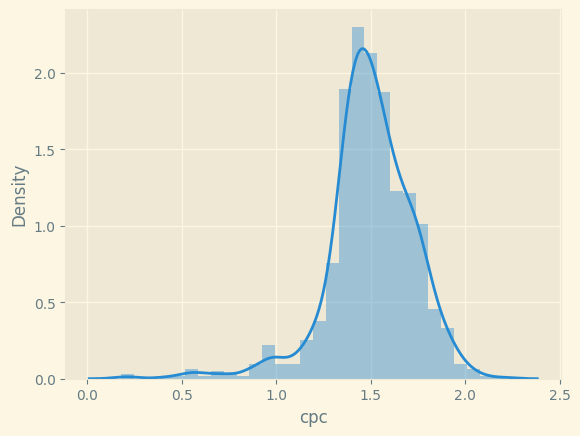

In [188]:
sns.distplot(conversion['cpc'].dropna(), bins=30);

In [189]:
round(ss.iqr(conversion['cpc'], nan_policy='omit'), 2)

0.25

Ответ: 0.25

### Задание 7

Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. Какой график получился?

![](https://storage.yandexcloud.net/klms-public/production/learning-content/11/79/614/1768/8106/fdgshed.png)

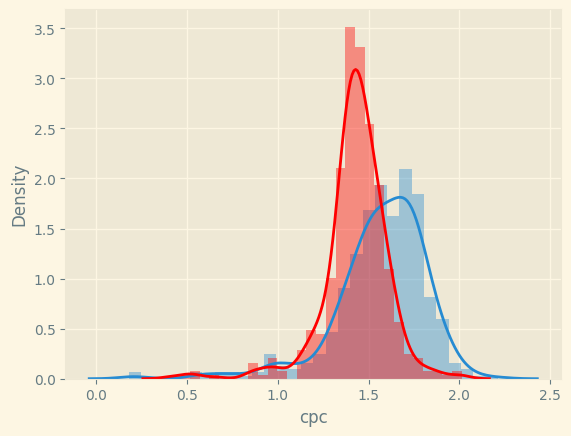

In [190]:
sns.distplot(conversion.query("gender == 'M'").dropna()['cpc'], bins=30)
sns.distplot(conversion.query("gender == 'F'").dropna()['cpc'], bins=30, color='r');

Ответ: B

### Задание 8

Конверсия (conversion rate) – отношение числа пользователей, совершивших целевое действие на определенном этапе, к общему числу тех, кто дошел до данного этапа.

Посчитайте конверсию из клика в покупку. В качестве ответа укажите конверсию для объявления 1121814 в процентах, округлив значение до 2 знаков после точки. 

*Например, если значение кликов равно 10, а покупок – 2, то CR на данном этапе составляет 2/10=0.2=20. Клики – Clicks, покупки – Approved_Conversion.*

In [191]:
conversion.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN


In [192]:
cr = conversion.groupby('ad_id', as_index=False)\
                .agg({'Clicks' : 'sum',\
                      'Approved_Conversion' : 'sum'})
cr.head(3)

,ad_id,Clicks,Approved_Conversion
0,708746,1,1
1,708749,2,0
2,708771,0,0


In [193]:
conversion['cr'] = cr['Approved_Conversion'] / cr['Clicks'] * 100
conversion.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,cr
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.43,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.91,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN,NaN


In [194]:
round(conversion.query("ad_id == 1121814")['cr'], 2)

860    3.09
Name: cr, dtype: float64

Ответ: 3.09